# Module 9 Part 3: Discriminative Models

This module consists of 3 parts:

* **Part 1** - Introduction to Bayesian inference
* **Part 2** - The diachronic interpretation
* **Part 3** - Discriminative models

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

<br>


**In this section**, we will discuss classification algorithms, specifically Naïve Bayesian classifiers.

### Discriminative Models <a id="discriminative"></a>

Logistic Regression, which we previously covered, looks to *place a decision boundary*. Classifiers that do this are known as **discriminative models**.

![logistic.png](attachment:logistic.png "Logistic classification")
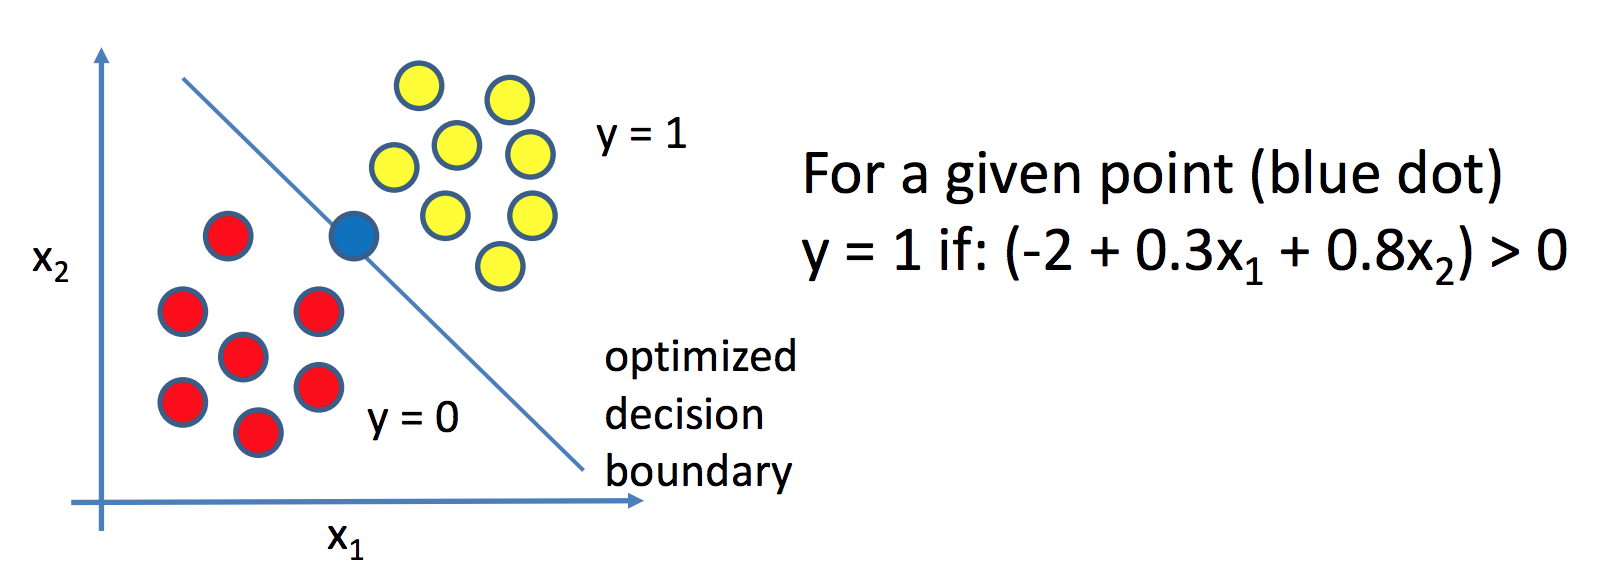

Image description: a graph with $x_1$ on the horizontal axis and $x_2$ on the vertical axis (representing variables). On the bottom left of the graph is a cluster of red dots with the label $y = 0$, and on the top right is a cluster of yellow dots with the label $y = 1$. Between them is a single blue dot. A diagnoal line with a negative slope bisects the two clusters and passes through the blue dot; the line is labelled 'optimized decision boundary'.

The graph is labelled:

For a given point (blue dot), $y = 1$ if: $(-2 + 0.3x_1 + 0.8x_2) > 0$.

#### Naïve Bayesian classifiers

When we use a Bayesian framework to classify, we do this on the basis of *association with other points*. This is known as a **generative model**.

![naive_bayes.png](attachment:naive_bayes.png "Naive Bayes")
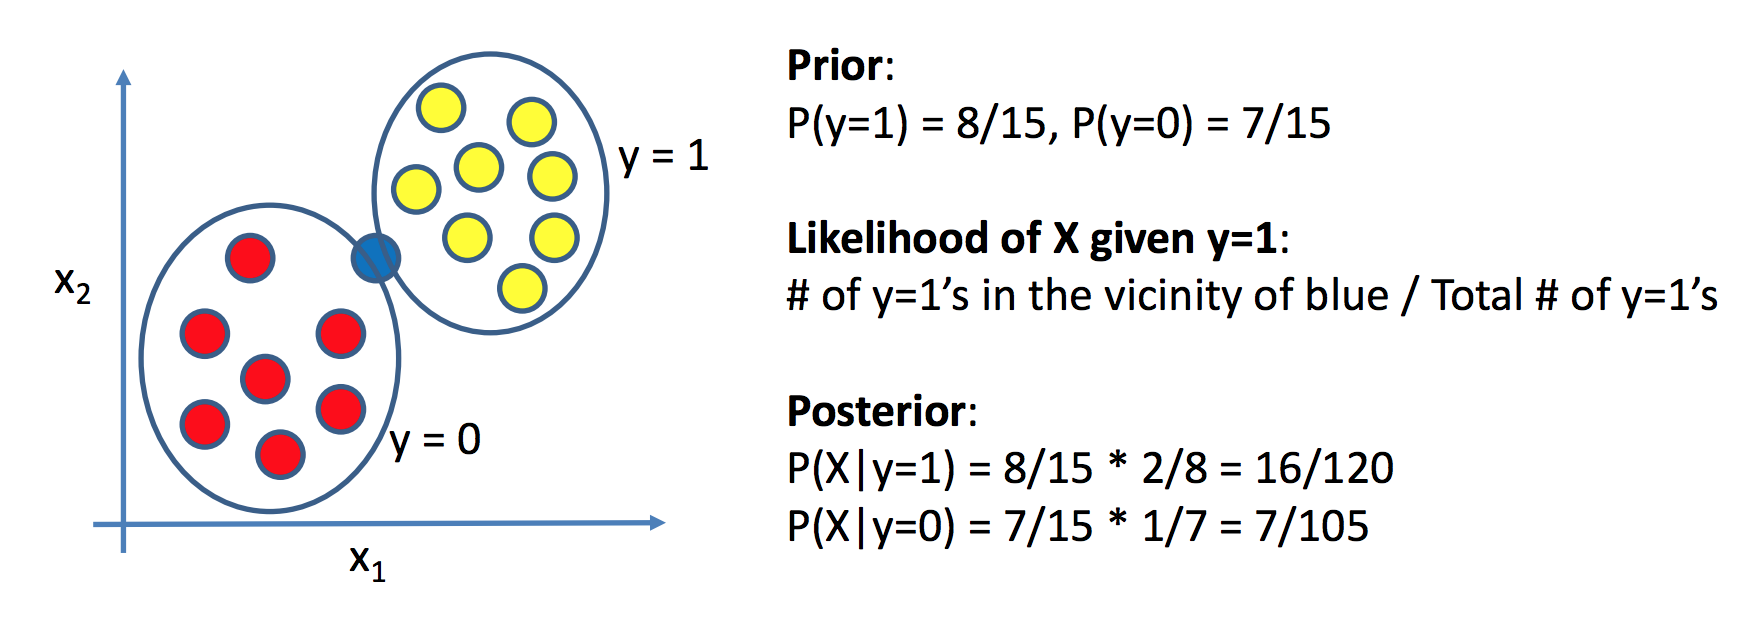

Image description: a graph with $x_1$ on the horizontal axis and $x_2$ on the vertical axis (representing variables). On the bottom left of the graph is a cluster of red dots with the label $y = 0$, and on the top right is a cluster of yellow dots with the label $y = 1$. Between them is a single blue dot. Two ellipses surround the red and yellow clusters, and both ellipse boundaries pass through the blue dot.

The graph is labelled:

**Prior:**

$P(y=1) = 8/15, P(y=0) = 7/15$

**Likelihood of X given $y = 1$:**

\# of $y=1$'s in the vicinity of blue / Total \# of $y=1$'s

**Posterior:**

$P(X \mid y=1) * P(y=1) = 2/8 \times 8/15 = 2/15$

$P(X \mid y=0) * P(y=0) = 1/7 \times 7/15 = 1/15$

__Example: Spam filter__

First spam filters were naive Bayes classifiers. Spam filter is a binary classification problem: $$Y = \{spam, ham\}$$
From collection of spam messages one can find set of special words which occur more often in spam messages. Suppose there a collection of $n_s$ spams and $n_h$ ham messages. For each special word $w$ we can count number of spam messages $n_{ws}$ and number of ham messages $n_{wh}$. Then, it is possible to estimate probabilities of special word appearence in spam and ham messages, respectively.
$$P(w \mid spam) = \frac{n_{ws}}{n_s}$$
$$P(w \mid ham) = \frac{n_{wh}}{n_h}$$

Filter is expected to find if new text message with special words $w_1,...,w_N$ is a spam. To perform this task probabalities $P(text \mid spam)$ and $P(text \mid ham)$ have to be estimated. 

$$P(text \mid spam) = P(w_1 \mid spam)P(w_2 \mid spam)...P(w_N \mid spam)$$

and

$$P(text \mid ham) = P(w_1 \mid ham)P(w_2 \mid ham)...P(w_N \mid ham)$$.

Here, it was assumed that the special words independently appear in the text. This is quite _naive_ assumption and this is why the classifier is called _naive Bayes classifier_. The idea of this classifier is to compute $P(spam \mid text)$ and $P(ham \mid text)$ using the Bayes rule:
$$P(y \mid text) = \frac{P(text \mid y) * P(y)}{P(y)}$$,
where y is spam or ham. To conclude the text is assigned to class with higher probability $P(y \mid text)$.

**Example: Golfing**

The following example is from Witten (2017)

The table below lists the factors that have influenced whether we have played golf over the past 14 days.

Today is sunny and cool with high humidity and strong wind. **Will we play golf?**

Outlook|Temp|Humidity|Windy|Play
:---:|:---:|:---:|:---:|:---:|
Sunny|hot|high|false|no|
Sunny|hot|high|true|no|
Overcast|hot|high|false|yes|
Rainy|mild|high|false|yes|
Rainy|cool|normal|false|yes|
Rainy|cool|normal|true|no|
Overcast|cool|normal|true|yes|
Sunny|mild|high|false|no|
Sunny|cool|normal|false|yes|
Rainy|mild|normal|false|yes|
Sunny|mild|normal|true|yes|
Overcast|mild|high|true|yes|
Overcast|hot|normal|false|yes|
Rainy|mild|high|true|no|

* Step 1: Determine the *priors*

Outlook|Temp|Humidity|Windy|Play
:---:|:---:|:---:|:---:|:---:|
Sunny|hot|high|false|<span style="color:red">no</span>|
Sunny|hot|high|true|<span style="color:red">no</span>|
Overcast|hot|high|false|<span style="color:blue">yes</span>|
Rainy|mild|high|false|<span style="color:blue">yes</span>|
Rainy|cool|normal|false|<span style="color:blue">yes</span>|
Rainy|cool|normal|true|<span style="color:red">no</span>|
Overcast|cool|normal|true|<span style="color:blue">yes</span>|
Sunny|mild|high|false|<span style="color:red">no</span>|
Sunny|cool|normal|false|<span style="color:blue">yes</span>|
Rainy|mild|normal|false|<span style="color:blue">yes</span>|
Sunny|mild|normal|true|<span style="color:blue">yes</span>|
Overcast|mild|high|true|<span style="color:blue">yes</span>|
Overcast|hot|normal|false|<span style="color:blue">yes</span>|
Rainy|mild|high|true|<span style="color:red">no</span>|
    
$$P(Play = \color{blue}{Yes}) = \color{blue}{\frac{9}{14}}$$
    
$$P(Play = \color{red}{No}) = \color{red}{\frac{5}{14}}$$

* Step 2: Determine the *likelihoods*

Outlook|Temp|Humidity|Windy|Play
:---:|:---:|:---:|:---:|:---:|
Sunny|hot|high|false|<span style="color:red">no</span>|
Sunny|hot|high|true|<span style="color:red">no</span>|
Overcast|hot|<span style="color:blue">high</span>|false|<span style="color:blue">yes</span>|
Rainy|mild|<span style="color:blue">high</span>|false|<span style="color:blue">yes</span>|
Rainy|<span style="color:blue">cool</span>|normal|false|<span style="color:blue">yes</span>|
Rainy|cool|normal|true|<span style="color:red">no</span>|
Overcast|<span style="color:blue">cool</span>|normal|<span style="color:blue">true</span>|<span style="color:blue">yes</span>|
Sunny|mild|high|false|<span style="color:red">no</span>|
<span style="color:blue">Sunny</span>|<span style="color:blue">cool</span>|normal|false|<span style="color:blue">yes</span>|
Rainy|mild|normal|false|<span style="color:blue">yes</span>|
<span style="color:blue">Sunny</span>|mild|normal|<span style="color:blue">true</span>|<span style="color:blue">yes</span>|
Overcast|mild|<span style="color:blue">high</span>|<span style="color:blue">true</span>|<span style="color:blue">yes</span>|
Overcast|hot|normal|false|<span style="color:blue">yes</span>|
Rainy|mild|high|true|<span style="color:red">no</span>|

$$P(Outlook = \color{blue}{Sunny}\ |\ Play = \color{blue}{Yes}) = \color{blue}{\frac{2}{9}}$$

$$P(Temp = \color{blue}{cool}\ |\ Play = \color{blue}{Yes}) = \color{blue}{\frac{3}{9}}$$

$$P(Humidity = \color{blue}{high}\ |\ Play = \color{blue}{Yes}) = \color{blue}{\frac{3}{9}}$$

$$P(Windy = \color{blue}{true}\ |\ Play = \color{blue}{Yes}) = \color{blue}{\frac{3}{9}}$$

Outlook|Temp|Humidity|Windy|Play
:---:|:---:|:---:|:---:|:---:|
<span style="color:red">Sunny</span>|hot|<span style="color:red">high</span>|false|<span style="color:red">no</span>|
<span style="color:red">Sunny</span>|hot|<span style="color:red">high</span>|<span style="color:red">true</span>|<span style="color:red">no</span>|
Overcast|hot|<span style="color:blue">high</span>|false|<span style="color:blue">yes</span>|
Rainy|mild|<span style="color:blue">high</span>|false|<span style="color:blue">yes</span>|
Rainy|<span style="color:blue">cool</span>|normal|false|<span style="color:blue">yes</span>|
Rainy|<span style="color:red">cool</span>|normal|<span style="color:red">true</span>|<span style="color:red">no</span>|
Overcast|<span style="color:blue">cool</span>|normal|<span style="color:blue">true</span>|<span style="color:blue">yes</span>|
<span style="color:red">Sunny</span>|mild|<span style="color:red">high</span>|false|<span style="color:red">no</span>|
<span style="color:blue">Sunny</span>|<span style="color:blue">cool</span>|normal|false|<span style="color:blue">yes</span>|
Rainy|mild|normal|false|<span style="color:blue">yes</span>|
<span style="color:blue">Sunny</span>|mild|normal|<span style="color:blue">true</span>|<span style="color:blue">yes</span>|
Overcast|mild|<span style="color:blue">high</span>|<span style="color:blue">true</span>|<span style="color:blue">yes</span>|
Overcast|hot|normal|false|<span style="color:blue">yes</span>|
Rainy|mild|<span style="color:red">high</span>|<span style="color:red">true</span>|<span style="color:red">no</span>|

$$P(Outlook = \color{red}{Sunny}\ |\ Play = \color{red}{No}) = \color{red}{\frac{3}{5}}$$

$$P(Temp = \color{red}{cool}\ |\ Play = \color{red}{No}) = \color{red}{\frac{1}{5}}$$

$$P(Humidity = \color{red}{high}\ |\ Play = \color{red}{No}) = \color{red}{\frac{4}{5}}$$

$$P(Windy = \color{red}{true}\ |\ Play = \color{red}{No}) = \color{red}{\frac{3}{5}}$$

* Step 3: Normalization

To normalize we need to find the total probability of observing condititions (Sunny, Temp, Humidity, Windy)
for both cases _Play = Yes_ and _Play = No_.

$$P(X) = P(X\ |\ Play = \color{blue}{Yes}) P(Play=\color{blue}{Yes}) + P(X\ |\ Play = \color{red}{No}) P(Play=\color{red}{No})$$

Since events in X are independent the probalities $P(X\ |\ Play = \color{blue}{Yes})$ and $P(X\ |\ Play = \color{red}{No})$ can be found by multiplying the conditional probalities of events:


$$P(X\ |\ Play = \color{blue}{Yes}) = P(Outlook = \color{orange}{Sunny}\ |\ Play = \color{blue}{Yes}) * P(Temp = \color{orange}{cool}\ |\ Play = \color{blue}{Yes}) * P(Humidity = \color{orange}{high}\ |\ Play = \color{blue}{Yes}) * P(Windy = \color{orange}{true}\ |\ Play = \color{blue}{Yes})$$


$$P(X\ |\ Play = \color{red}{No}) = P(Outlook = \color{red}{Sunny}\ |\ Play = \color{red}{No})P(Temp = \color{red}{cool}\ |\ Play = \color{red}{No})P(Humidity = \color{red}{high}\ |\ Play = \color{red}{No})P(Windy = \color{red}{true}\ |\ Play = \color{red}{No}) $$


$$P(X) = \color{orange}{\frac{2}{9}} \color{orange}{\frac{3}{9}} \color{orange}{\frac{3}{9}} \color{orange}{\frac{3}{9}} * \color{blue}{\frac{9}{14}} + \color{orange}{\frac{3}{5}} \color{orange}{\frac{1}{5}} \color{orange}{\frac{4}{5}} \color{orange}{\frac{3}{5}} * \color{red}{\frac{5}{14}}$$


Bringing these things together, we can now calculate the probability of the hypothesis H given the data D:
    
$$P(H\ |\ D) = P(D\ |\ H)P(H)$$

That is, to find the probability of us playing (Yes or No) given the general conditions (X), we first have to find the probability of X given Play = Yes or No, multiply by P(Play), and divide by P(X) to normalize.
    
$$P(X\ |\ Play = \color{blue}{Yes}) P(Play=\color{blue}{Yes}) = (\color{blue}{\frac{2}{9}} \times \color{blue}{\frac{3}{9}} \times \color{blue}{\frac{3}{9}} \times \color{blue}{\frac{3}{9}}) \times \color{blue}{\frac{9}{14}} = \color{blue}{0.00529}$$

$$P(X\ |\ Play = \color{red}{No}) P(Play=\color{red}{No}) = (\color{red}{\frac{3}{5}} \times \color{red}{\frac{1}{5}} \times \color{red}{\frac{4}{5}} \times \color{red}{\frac{3}{5}}) \times \color{red}{\frac{5}{14}} = \color{red}{0.02057}$$

$$P(X) = P(X\ |\ Play = \color{blue}{Yes}) P(Play=\color{blue}{Yes}) + P(X\ |\ Play = \color{red}{No}) P(Play=\color{red}{No}) = \color{blue}{0.00529} + \color{red}{0.02057} = \color{orange}{0.02586}$$

$$P(Play = \color{blue}{Yes}\ |\ X) = \color{blue}{0.00529}\ /\ \color{orange}{0.02586} = \color{blue}{0.20456}$$

$$P(Play = \color{red}{No}\ |\ X) = \color{red}{0.02057}\ /\ \color{orange}{0.02586} = \color{red}{0.79544}$$

We can express this using the odds ratio:

$$0.20456\ /\ 0.79544 = 0.257$$

(An odds ratio > 1 is associated with a higher chance of an occurrence, and < 1 is associated with a lower chance of an occurrence.)

<br>
<center>**No, we will not be playing today!**</center>

Why are Bayesian classifiers 'naïve'?

* NBCs assume that the conditional probabilities of the inputs are independent, e.g., $P(X\ |\ H) = P(Sunny\ |\ H) \times P(cool\ |\ H) \times P(humid\ |\ H) \times P(windy\ |\ H)$; this is likely not the case

* Advantages of Naïve Bayesian Classifiers: Easy, fast, they work with categorical data

What do we do with continuous data?
* Option 1: Use quantiles or other 'bins' to turn the continuous data into categorical data
* Option 2: Assume a given distribution for the data, and use that distribution to model the data

* Step 1: Determine the *priors* (note that the **Temp °C** column has continuous rather than the hot/mild/cool categorical data shown previously)

Outlook|Temp °C|Humidity|Windy|Play
:---:|:---:|:---:|:---:|:---:|
Sunny|30|high|false|<span style="color:red">no</span>|
Sunny|28|high|true|<span style="color:red">no</span>|
Overcast|29|high|false|<span style="color:blue">yes</span>|
Rainy|25|high|false|<span style="color:blue">yes</span>|
Rainy|22|normal|false|<span style="color:blue">yes</span>|
Rainy|21|normal|true|<span style="color:red">no</span>|
Overcast|20|normal|true|<span style="color:blue">yes</span>|
Sunny|24|high|false|<span style="color:red">no</span>|
Sunny|21|normal|false|<span style="color:blue">yes</span>|
Rainy|25|normal|false|<span style="color:blue">yes</span>|
Sunny|24|normal|true|<span style="color:blue">yes</span>|
Overcast|25|high|true|<span style="color:blue">yes</span>|
Overcast|30|normal|false|<span style="color:blue">yes</span>|
Rainy|24|high|true|<span style="color:red">no</span>|
    
$$P(Play = \color{blue}{Yes}) = \color{blue}{\frac{9}{14}}$$
    
$$P(Play = \color{red}{No}) = \color{red}{\frac{5}{14}}$$

* Step 2: Determine the *likelihoods*

Outlook|Temp °C|Humidity|Windy|Play
:---:|:---:|:---:|:---:|:---:|
Sunny|<span style="color:red">30</span>|high|false|<span style="color:red">no</span>|
Sunny|<span style="color:red">28</span>|high|true|<span style="color:red">no</span>|
Overcast|<span style="color:blue">29</span>|high|false|<span style="color:blue">yes</span>|
Rainy|<span style="color:blue">25</span>|high|false|<span style="color:blue">yes</span>|
Rainy|<span style="color:blue">22</span>|normal|false|<span style="color:blue">yes</span>|
Rainy|<span style="color:red">21</span>|normal|true|<span style="color:red">no</span>|
Overcast|<span style="color:blue">20</span>|normal|true|<span style="color:blue">yes</span>|
Sunny|<span style="color:red">24</span>|high|false|<span style="color:red">no</span>|
Sunny|<span style="color:blue">21</span>|normal|false|<span style="color:blue">yes</span>|
Rainy|<span style="color:blue">25</span>|normal|false|<span style="color:blue">yes</span>|
Sunny|<span style="color:blue">24</span>|normal|true|<span style="color:blue">yes</span>|
Overcast|<span style="color:blue">25</span>|high|true|<span style="color:blue">yes</span>|
Overcast|<span style="color:blue">30</span>|normal|false|<span style="color:blue">yes</span>|
Rainy|<span style="color:red">24</span>|high|true|<span style="color:red">no</span>|
    
$$Mean\ (\color{blue}{play}) = \color{blue}{24.5556}$$

$$Variance\ (\color{blue}{play}) = \color{blue}{11.2778}$$

$$Mean\ (\color{red}{not\ play}) = \color{red}{25.4000}$$

$$Variance\ (\color{red}{not\ play}) = \color{red}{12.8000}$$

Today is sunny and 22 °C with high humidity and strong wind. **Will we play golf?**

$$P(X\ |\ Play = \color{blue}{Yes}) P(Play=\color{blue}{Yes}) = (\color{blue}{\frac{2}{9}} \times \color{blue}{\ ?\ } \times \color{blue}{\frac{3}{9}} \times \color{blue}{\frac{3}{9}}) \times \color{blue}{\frac{9}{14}} = \color{blue}{\ ?}$$

$$P(X\ |\ Play = \color{red}{No}) P(Play=\color{red}{No}) = (\color{red}{\frac{3}{5}} \times \color{red}{\ ?\ } \times \color{red}{\frac{4}{5}} \times \color{red}{\frac{3}{5}}) \times \color{red}{\frac{5}{14}} = \color{red}{\ ?}$$

$$P(X) = P(X\ |\ Play = \color{blue}{Yes}) P(Play=\color{blue}{Yes}) + P(X\ |\ Play = \color{red}{No}) P(Play=\color{red}{No})$$

We can get the probabilities for temperature by assuming that temperature (given yes) and temperature (given no) follow normal distributions.

Normal distributions can be described by a probability density function:

![normal_pdf.png](attachment:normal_pdf.png "Normal distribution")
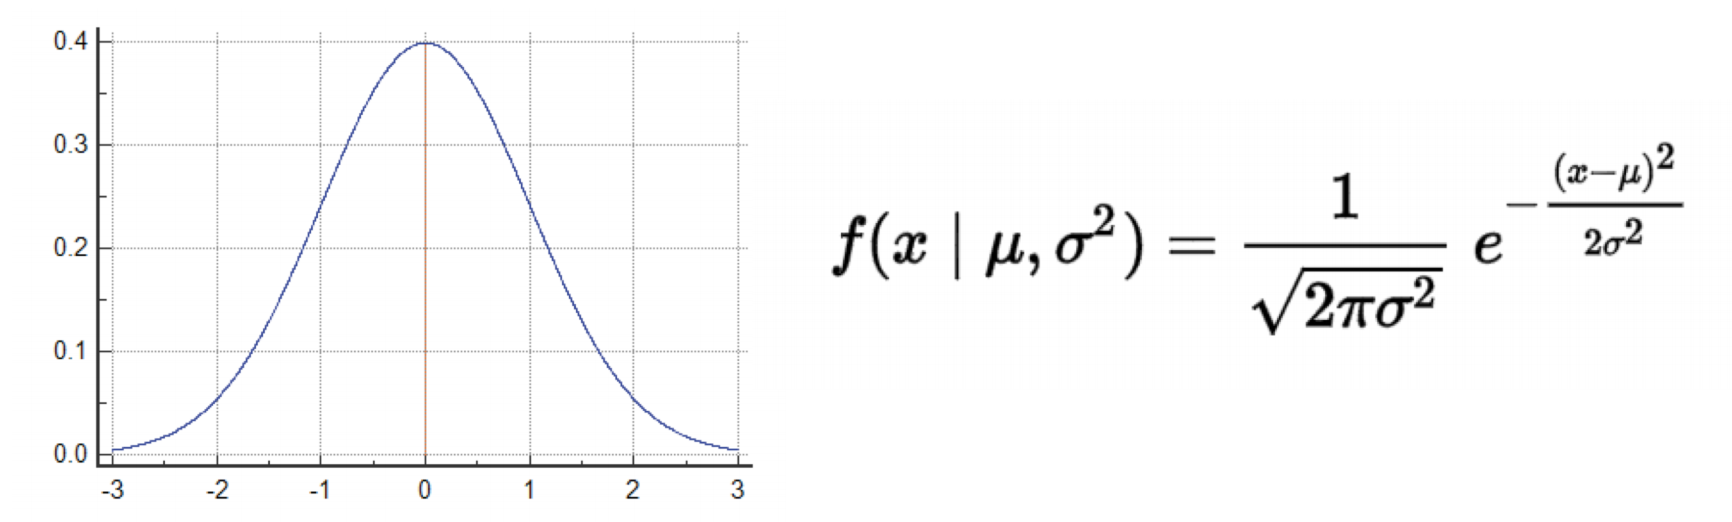

Image description: a graph with the x-axis running from -3 to 3 and the y-axis from 0.0 to 0.4. A symmetrical, bell-shaped normal curve centred around 0 is displayed on the graph. The graph is labelled:

$f(x \mid \mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^-\frac{(x-\mu)^2}{2\sigma^2}$

We can use this equation to get our probabilities.

Plugging these values back in we get:

$$P(H\ |\ D) = P(D\ |\ H)P(H)$$

$$P(X\ |\ Play = \color{blue}{Yes}) P(Play=\color{blue}{Yes}) = (\color{blue}{\frac{2}{9}} \times \color{blue}{\frac{3}{9}} \times \color{blue}{\frac{3}{9}}) \times \color{blue}{\frac{9}{14}} \times \color{blue}{0.0889} = \color{blue}{0.0014}$$

$$P(X\ |\ Play = \color{red}{No}) P(Play=\color{red}{No}) = (\color{red}{\frac{3}{5}} \times \color{red}{\frac{4}{5}} \times \color{red}{\frac{3}{5}}) \times \color{red}{\frac{5}{14}} \times \color{red}{0.0710} = \color{red}{0.0073}$$
    
Odds ratio:

$$0.0014\ /\ 0.0073 = 0.192$$

<br>
<center>**We will still not be playing golf today!**</center>

**NOTE:** Gaussian Naïve Bayes estimates are inherently uncalibrated - i.e., they tend to make very extreme predictions, so this must be remembered when using such classifiers.)

#### EXERCISE: Live Music

Jim likes going to see live music, but there are several factors that determine whether he will go and see any particular band: the genre, whether it's sunny or raining, or whether the venue is small and local or at a stadium.

Genre|Weather|Location|Go
:---:|:---:|:---:|:---:|
Metal|rain|stadium|no|
Rock|rain|local|yes|
Metal|sun|local|no|
Metal|sun|local|yes|
Rock|rain|local|no|
Indie|rain|stadium|yes|
Indie|sun|local|yes|

It's a sunny day, and a rock band is playing at the stadium! Will Jim go?

In [1]:
#your work here

What about if it's a local venue? Is Jim more or less likely to go?

In [2]:
#your work here

#### EXERCISE: Solution

In [3]:
# Priors
P_Go_Yes = 4/7
P_Go_No = 3/7

In [4]:
# Likelihoods
P_Rock_given_Yes = 1/4
P_Sun_given_Yes = 2/4
P_Stadium_given_Yes = 1/4

P_Rock_given_No = 1/3
P_Sun_given_No = 1/3
P_Stadium_given_No = 1/3

In [5]:
# Normalization
P_Rock = 2/7
P_Sun = 3/7
P_Stadium = 2/7

In [6]:
# Combining probabilities
# First, we find the probabilities of observing variables Weather=Sunny, Genre=Rock and Location=Stadium
# conditioned on Go (Yes or No). From the table we know that Go = Yes was observerved 4 times,
# For those 4 visits genre was rock only once, so P(Rock | Yes) = 1/4,
# Weather was sunny two times, so P(Sunny | Yes) = 2/4
# Location was Stadium 1 times, so P(Stadium | Yes) = 1/4

P_X_given_Yes = P_Rock_given_Yes * P_Sun_given_Yes * P_Stadium_given_Yes 
P_X_given_Yes = (1/4 * 2/4 * 1/4)
P_X_given_No = P_Rock_given_No * P_Sun_given_No * P_Stadium_given_No
P_X_given_No = (1/3 * 1/3 * 1/3)
# Next we find the probability of observing rock concert on a sunny day at the stadium.
# This can be found as a combination of X when Jim went to a concert or did not go:
# P(X) = P(X | Yes)* P(Yes) + P(X | No)* P(No)
P_X = P_X_given_Yes * P_Go_Yes + P_X_given_No * P_Go_No

print('conditional probability X given Yes:', P_X_given_Yes)
print('probability of X= (Rock, Sunny, Stadium):', P_X)

conditional probability X given Yes: 0.03125
probability of X= (Rock, Sunny, Stadium): 0.03373015873015873


In [7]:
# Posterior probability
P_Yes_given_X = (P_X_given_Yes * P_Go_Yes) / P_X
P_Yes_given_X

0.5294117647058824

In [8]:
P_No_given_X = (P_X_given_No * P_Go_No) / P_X
P_No_given_X

0.47058823529411764

In [9]:
# Odds ratio:
P_Yes_given_X / P_No_given_X

1.125

Looks like Jim will likely go! If it were at a local venue:

In [10]:
P_Local_given_Yes = 3/4
P_Local_given_No = 2/3

P_X_given_Yes = P_Rock_given_Yes * P_Sun_given_Yes * P_Local_given_Yes
P_X_given_No = P_Rock_given_No * P_Sun_given_No * P_Local_given_No

P_X = P_X_given_Yes * P_Go_Yes + P_X_given_No * P_Go_No

In [11]:
P_Yes_given_X = (P_X_given_Yes * P_Go_Yes) / P_X
P_Yes_given_X

0.6279069767441859

In [12]:
P_No_given_X = (P_X_given_No * P_Go_No) / P_X
P_No_given_X

0.37209302325581395

In [13]:
# Odds ratio:
P_Yes_given_X / P_No_given_X

1.6874999999999998

Jim is more likely to go when the venue is local.

## References

Witten, I.H., Frank, E., Hall, M.A., & Pal, C.J. (2017). Data mining – Practical machine learning tools and techniques (4th Ed.). Cambridge: Morgan Kaufmann (Elsevier).


<br>


**End of module**

You have reached the end of this module. 

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

When you are comfortable with the content, and have practiced to your satisfaction, you may proceed to any related assignments, and to the next module.